# **Exercise 1: Setting Up the Environment**

**1. Install Libraries:**

In [57]:
!pip install pgmpy

# **2. Import Libraries:**

In [58]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator
import networkx as nx
import matplotlib.pyplot as plt

# **Exercise 2: Define the Bayesian Network Structure**

**1. Define the Variables:**

In [59]:
model = BayesianNetwork([
    ('Age', 'HeartDisease'),
    ('Smoking', 'HeartDisease'),
    ('Exercise', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease'),
    ('BloodPressure', 'HeartDisease'),  # Ensure this matches the CPD definition
    ('HeartDisease', 'ChestPain'),
    ('HeartDisease', 'ECGResult')
])

# **Exercise 3: Define Conditional Probability Tables (CPTs)**

**1. Create CPTs Using pgmpy:**

In [60]:
cpd_age = TabularCPD(variable='Age', variable_card=3, values=[[0.3], [0.5], [0.2]])

cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[0.6], [0.4]])

cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.7], [0.3]])

cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.4], [0.6]])

cpd_blood_pressure = TabularCPD(variable='BloodPressure', variable_card=2, values=[[0.55], [0.45]])

cpd_heart_disease = TabularCPD(
    variable='HeartDisease', variable_card=2,
    values=[
        # No Heart Disease
        [0.99, 0.95, 0.9, 0.85, 0.9, 0.85, 0.8, 0.75, 0.85, 0.8, 0.75, 0.7,
         0.75, 0.7, 0.65, 0.6, 0.7, 0.65, 0.6, 0.55, 0.65, 0.6, 0.55, 0.5,
         0.6, 0.55, 0.5, 0.45, 0.55, 0.5, 0.45, 0.4, 0.5, 0.45, 0.4, 0.35,
         0.45, 0.4, 0.35, 0.3, 0.4, 0.35, 0.3, 0.25, 0.35, 0.3, 0.25, 0.2],

        # Yes Heart Disease
        [0.01, 0.05, 0.1, 0.15, 0.1, 0.15, 0.2, 0.25, 0.15, 0.2, 0.25, 0.3,
         0.25, 0.3, 0.35, 0.4, 0.3, 0.35, 0.4, 0.45, 0.35, 0.4, 0.45, 0.5,
         0.4, 0.45, 0.5, 0.55, 0.45, 0.5, 0.55, 0.6, 0.5, 0.55, 0.6, 0.65,
         0.55, 0.6, 0.65, 0.7, 0.6, 0.65, 0.7, 0.75, 0.65, 0.7, 0.75, 0.8]
    ],
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'BloodPressure'],
    evidence_card=[3, 2, 2, 2, 2]
)

# CPD for Chest Pain
cpd_chest_pain = TabularCPD(
    variable='ChestPain', variable_card=2,
    values=[[0.8, 0.3], [0.2, 0.7]],
    evidence=['HeartDisease'],
    evidence_card=[2]
)

# CPD for ECG Result
cpd_ecg_result = TabularCPD(
    variable='ECGResult', variable_card=2,
    values=[[0.9, 0.4], [0.1, 0.6]],
    evidence=['HeartDisease'],
    evidence_card=[2]
)

model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_blood_pressure,
               cpd_heart_disease, cpd_chest_pain, cpd_ecg_result)

assert model.check_model()

# **Exercise 4: Inference in the Bayesian Network**

**1. Perform Probabilistic Inference:**

In [61]:
inference = VariableElimination(model)

query_result = inference.query(variables=['HeartDisease'], evidence={'Age': 1, 'Smoking': 1, 'Cholesterol': 1, 'BloodPressure': 1})
print(query_result)

query_result = inference.query(variables=['ECGResult'], evidence={'ChestPain': 1})
print(query_result)

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.4350 |
+-----------------+---------------------+
| HeartDisease(1) |              0.5650 |
+-----------------+---------------------+
+--------------+------------------+
| ECGResult    |   phi(ECGResult) |
+==============+==================+
| ECGResult(0) |           0.5508 |
+--------------+------------------+
| ECGResult(1) |           0.4492 |
+--------------+------------------+


**2. Posterior Probability Analysis:**

In [62]:
query_result = inference.query(variables=['HeartDisease'], evidence={'Exercise': 0})
print(query_result)

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.6211 |
+-----------------+---------------------+
| HeartDisease(1) |              0.3789 |
+-----------------+---------------------+


# **Exercise 5: Parameter Learning from Simulated Data**

**1. Simulate a Healthcare Dataset:**

In [63]:
import numpy as np
import pandas as pd

num_patients = 1000

age = np.random.choice([0, 1, 2], size=num_patients, p=[0.3, 0.5, 0.2])
smoking = np.random.choice([0, 1], size=num_patients, p=[0.7, 0.3])
exercise = np.random.choice([0, 1], size=num_patients, p=[0.6, 0.4])
cholesterol = np.random.choice([0, 1], size=num_patients, p=[0.6, 0.4])
blood_pressure = np.random.choice([0, 1], size=num_patients, p=[0.7, 0.3])

# Heart Disease: depends on Age, Smoking, Exercise, Cholesterol, Blood Pressure
heart_disease = []
for i in range(num_patients):
    if age[i] == 2 or smoking[i] == 1 or exercise[i] == 1 or cholesterol[i] == 1 or blood_pressure[i] == 1:
        # Higher chance of heart disease
        heart_disease.append(np.random.choice([0, 1], p=[0.4, 0.6]))
    else:
        # Lower chance of heart disease
        heart_disease.append(np.random.choice([0, 1], p=[0.8, 0.2]))

# Chest Pain: depends on Heart Disease
chest_pain = [np.random.choice([0, 1], p=[0.2, 0.8]) if hd == 1 else np.random.choice([0, 1], p=[0.9, 0.1]) for hd in heart_disease]

# ECG Result: depends on Heart Disease
ecg_result = [np.random.choice([0, 1], p=[0.3, 0.7]) if hd == 1 else np.random.choice([0, 1], p=[0.85, 0.15]) for hd in heart_disease]

data = pd.DataFrame({
    'Age': age,
    'Smoking': smoking,
    'Exercise': exercise,
    'Cholesterol': cholesterol,
    'BloodPressure': blood_pressure,
    'HeartDisease': heart_disease,
    'ChestPain': chest_pain,
    'ECGResult': ecg_result
})

data['Age'] = data['Age'].map({0: 'Young', 1: 'Middle-aged', 2: 'Old'})
data['Smoking'] = data['Smoking'].map({0: 'No', 1: 'Yes'})
data['Exercise'] = data['Exercise'].map({0: 'Regular', 1: 'None'})
data['Cholesterol'] = data['Cholesterol'].map({0: 'Normal', 1: 'High'})
data['BloodPressure'] = data['BloodPressure'].map({0: 'Normal', 1: 'High'})
data['HeartDisease'] = data['HeartDisease'].map({0: 'No', 1: 'Yes'})
data['ChestPain'] = data['ChestPain'].map({0: 'No', 1: 'Yes'})
data['ECGResult'] = data['ECGResult'].map({0: 'Normal', 1: 'Abnormal'})

data

,Age,Smoking,Exercise,Cholesterol,BloodPressure,HeartDisease,ChestPain,ECGResult
0,Young,Yes,None,High,Normal,Yes,Yes,Abnormal
1,Middle-aged,No,Regular,High,Normal,Yes,No,Abnormal
2,Young,Yes,Regular,Normal,Normal,Yes,No,Abnormal
3,Middle-aged,No,Regular,Normal,Normal,Yes,Yes,Normal
4,Middle-aged,No,Regular,High,High,Yes,No,Abnormal
...,...,...,...,...,...,...,...,...
995,Young,Yes,Regular,Normal,High,Yes,Yes,Normal
996,Old,Yes,Regular,High,High,Yes,Yes,Abnormal
997,Middle-aged,No,Regular,Normal,Normal,No,No,Normal
998,Middle-aged,Yes,Regular,High,Normal,Yes,Yes,Abnormal


**2. Estimate Parameters:**

In [64]:
model = BayesianNetwork([
    ('Age', 'HeartDisease'),
    ('Smoking', 'HeartDisease'),
    ('Exercise', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease'),
    ('BloodPressure', 'HeartDisease'),
    ('HeartDisease', 'ChestPain'),
    ('HeartDisease', 'ECGResult')
])

model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)
    print("\n")

+------------------+-------+
| Age(Middle-aged) | 0.488 |
+------------------+-------+
| Age(Old)         | 0.221 |
+------------------+-------+
| Age(Young)       | 0.291 |
+------------------+-------+


+-------------------+---------------------+-----+-----------------------+
| Age               | Age(Middle-aged)    | ... | Age(Young)            |
+-------------------+---------------------+-----+-----------------------+
| BloodPressure     | BloodPressure(High) | ... | BloodPressure(Normal) |
+-------------------+---------------------+-----+-----------------------+
| Cholesterol       | Cholesterol(High)   | ... | Cholesterol(Normal)   |
+-------------------+---------------------+-----+-----------------------+
| Exercise          | Exercise(None)      | ... | Exercise(Regular)     |
+-------------------+---------------------+-----+-----------------------+
| Smoking           | Smoking(No)         | ... | Smoking(Yes)          |
+-------------------+---------------------+-----+------

# **Exercise 6: Network Visualization and Analysis**

**1. Visualize the Network:**

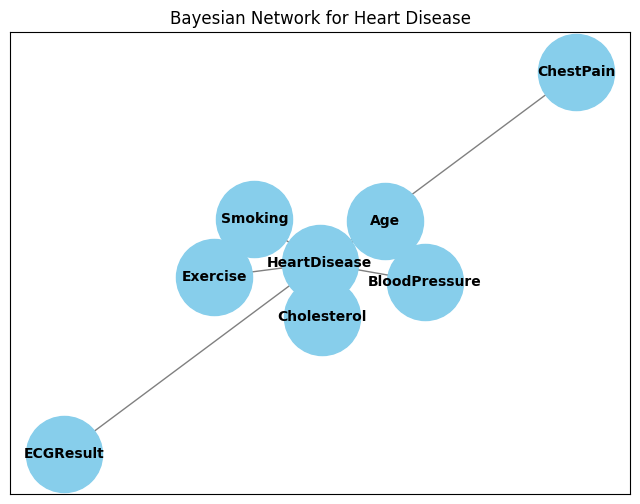

In [65]:
# Step 2: Visualize the Bayesian Network using networkx
# Convert the pgmpy model to a networkx graph
graph = nx.DiGraph(model.edges())

# Draw the graph with labels and layout
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)  # Positioning of nodes

# Draw nodes
nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=3000)

# Draw edges
nx.draw_networkx_edges(graph, pos, arrowstyle='->', arrowsize=20, edge_color='gray')

# Add labels to the nodes
nx.draw_networkx_labels(graph, pos, font_size=10, font_color='black', font_weight='bold')

# Display the graph
plt.title("Bayesian Network for Heart Disease")
plt.show()

**2. Sensitivity Analysis:**

In [66]:
query_result = inference.query(variables=['HeartDisease'], evidence={'Smoking': 1})
print("Probability of Heart Disease given Smoking = Yes:")
print(query_result)

query_result = inference.query(variables=['HeartDisease'], evidence={'Smoking': 0})
print("Probability of Heart Disease given Smoking = No:")
print(query_result)

Probability of Heart Disease given Smoking = Yes:
+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.5330 |
+-----------------+---------------------+
| HeartDisease(1) |              0.4670 |
+-----------------+---------------------+
Probability of Heart Disease given Smoking = No:
+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.6475 |
+-----------------+---------------------+
| HeartDisease(1) |              0.3525 |
+-----------------+---------------------+
